In [1]:
# Uncomment to install NLTK required libraries
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')
# nltk.download('opinion_lexicon')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import re
import requests

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from gensim.utils import lemmatize
import pattern

In [3]:
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [4]:
df = pd.read_csv('cleaned_transcript.csv')
df.head()

,Speaker,Statement
0,HOLT,"Good evening everyone, I am Lester Holt and w..."
1,GUTHRIE,"Hi, I’m Savannah Guthrie and tonight it’s our..."
2,HOLT,Voters are trying to nail down where the cand...
3,GUTHRIE,"Well, now it’s time to find out."
4,UNKNOWN,Tonight round one. New Jersey Senator Cory Bo...


In [5]:
sid = SentimentIntensityAnalyzer()
sentiment = sid.polarity_scores(df.Statement[0])
sentiment_score = sentiment['compound']
print(df.Statement[0],sentiment)

 Good evening everyone, I am Lester Holt and welcome to the first democratic debate in the 2020 race for president. {'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.7096}


In [12]:
def process_statement(speaker, statement):
    # Calculate sentiment based on full string
    sentiment = sid.polarity_scores(statement)
    sentiment_score = sentiment['compound']
    
    # process data
    lower = statement.lower()
    words = lower.split()
    reformed = [appos[word] if word in appos else word for word in words]
    reformed = " ".join(reformed)
    
    stop_words = stopwords.words('english')
    
    # tokenize data and perform lemmatization
    tokens = word_tokenize(reformed)
    nostops = [i for i in tokens if i not in stop_words]
    words = [word for word in nostops if word.isalpha()]
    lemm_full = [x.decode('utf-8') for x in lemmatize(str(lower))]
    #lemm = [x.decode('utf-8').split('/') for x in lemmatize(str(lower))]
    #lem_words = [x[0] for x in lemm]
    #lem_tags = [x[1] for x in lemm]
    
    return [speaker, statement, sentiment_score, words, lemm_full]

In [13]:
processedTranscript = pd.DataFrame(columns=['speaker','statement', 'sentiment','words', 'lemmatization'])
for index,row in df.iterrows():
    speaker = row['Speaker']
    statement = row['Statement']
    processedTranscript.loc[len(processedTranscript)] = process_statement(speaker, statement)

In [14]:
processedTranscript.head()

,speaker,statement,sentiment,words,lemmatization
0,HOLT,"Good evening everyone, I am Lester Holt and w...",0.7096,"[good, evening, everyone, lester, holt, welcom...","[good/JJ, evening/NN, everyone/NN, be/VB, lest..."
1,GUTHRIE,"Hi, I’m Savannah Guthrie and tonight it’s our...",0.1531,"[hi, savannah, guthrie, tonight, first, chance...","[savannah/NN, guthrie/NN, tonight/NN, first/JJ..."
2,HOLT,Voters are trying to nail down where the cand...,0.0000,"[voters, trying, nail, candidates, issues, set...","[voter/NN, be/VB, try/VB, nail/VB, candidate/N..."
3,GUTHRIE,"Well, now it’s time to find out.",0.2732,"[well, time, find]","[well/RB, now/RB, time/NN, find/VB]"
4,UNKNOWN,Tonight round one. New Jersey Senator Cory Bo...,0.0000,"[tonight, round, one, new, jersey, senator, co...","[tonight/NN, round/NN, new/JJ, jersey/NN, sena..."


In [15]:
processedTranscript.to_csv('processed_transcript.csv')

In [16]:
# Statements by Speaker
processedTranscript[['speaker', 'statement']].groupby(['speaker']).agg(['count'])

,statement
,count
speaker,
BOOKER,25
CASTRO,32
DE BLASIO,20
DELANEY,32
DIAZ-BALART,26
GABBARD,17
GUTHRIE,37
HOLT,54


In [17]:
# Average sentiment by speaker
processedTranscript[['speaker', 'sentiment']].groupby(['speaker']).agg(['mean'])

,sentiment
,mean
speaker,
BOOKER,0.130664
CASTRO,0.165347
DE BLASIO,-0.097225
DELANEY,0.164800
DIAZ-BALART,0.119900
GABBARD,-0.118912
GUTHRIE,0.138573
HOLT,0.221850


In [44]:
# lowest and highest sentiment by speaker
maxPos = processedTranscript[['speaker', 'sentiment']].groupby(['speaker'], as_index=False).agg(['max'])
maxNeg = processedTranscript[['speaker', 'sentiment']].groupby(['speaker'], as_index=False).agg(['min'])
pd.concat([maxNeg,maxPos],axis=1)

sentiment        
                  min     max
speaker                      
BOOKER        -0.8316  0.9876
CASTRO        -0.6674  0.9601
DE BLASIO     -0.9566  0.9786
DELANEY       -0.8294  0.9774
DIAZ-BALART   -0.7783  0.8294
GABBARD       -0.9901  0.9836
GUTHRIE       -0.8273  0.9022
HOLT          -0.7691  0.8343
INSLEE        -0.4939  0.9812
KLOBUCHAR     -0.9683  0.9711
MADDOW        -0.5244  0.9246
O’ROURKE      -0.8126  0.9919
RYAN          -0.9062  0.9197
TODD          -0.9524  0.9361
UNKNOWN        0.0000  0.2960
WARREN        -0.9858  0.9709

In [50]:
# highest sentiment per transcript was from Beto O'Rourke
processedTranscript.statement[409]

' John, I appreciate the—the question. The answer is yes, but that action should always be undertaken with allies and partners and friends. When the United States presents a united front, we have a much better chance of achieving our foreign policy aims and preventing the kind of genocide to which you refer, the kind of genocide that we saw in Rwanda, the kind of genocide we want to stop doing forward. But unfortunately, under this administration, President Trump has alienated our allies and our friends and our alliances. He’s diminished our standing in the world and he’s made us weaker as a country, less able to confront challenges whether it’s Iran or North Korea or Vladimir Putin in Russia who attacked and invaded our democracy in 2016 and who President Trump has offered another invitation to do the same. He’s embraced strong men and dictators at the expense of the great democracies. As president, I will make sure that we live our values and our foreign policy. I will ensure that we

In [52]:
# The lowest sentiment (most 'negative') came from Elizabeth Warren
processedTranscript.statement[267]

' So, in this period of time that I’ve been running for president I’ve had more than 100 town halls. I’ve taken more than 2000 unfiltered questions and the single hardest question I’ve gotten—I got one from a little boy and I got one from a little girl—and that is to say, when you’re President how are you going to keep us safe? That’s our responsibility as adults. Seven children will die today from gun violence—children and teenagers. And they won’t just die in mass shootings. They’ll die on sidewalks. They’ll die in playgrounds. They’ll die in people’s backyards. Gun violence is a national health emergency in this country and we need to treat it like that. So what can we do? We can do the things that are sensible. We can do the universal background checks. We can ban the weapons of war. But we can also double down on the research and find out what really works. Where it is that we can make the differences at the margins that will keep our children safe.'

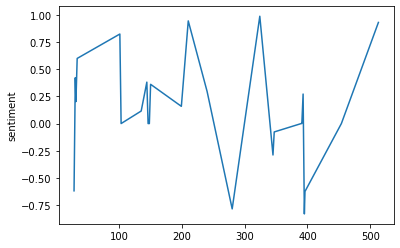

In [65]:
# sentiment by statement over course of entire debate
chosen = processedTranscript[processedTranscript.speaker == 'BOOKER']
sns.lineplot(x=chosen.index, y=chosen.sentiment)

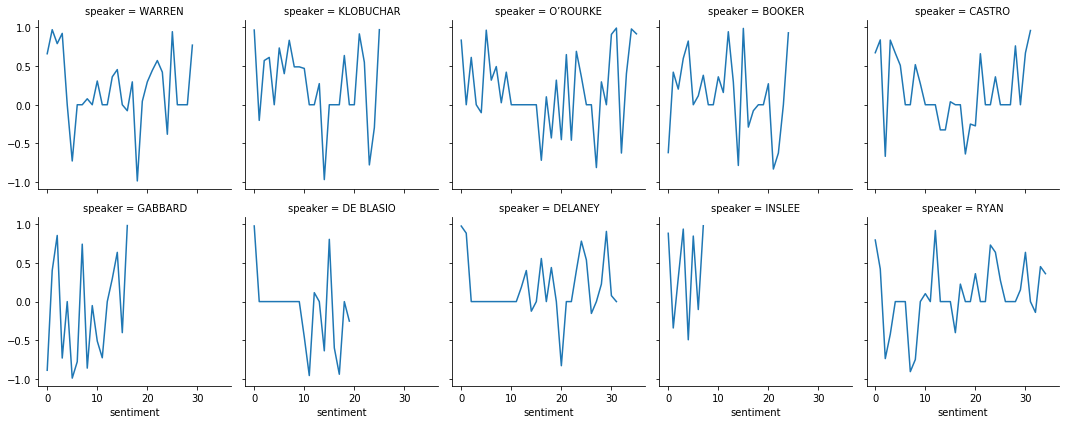

In [88]:
# Candidate sentiment trends by statement over course of debate.
g = sns.FacetGrid(processedTranscript[~processedTranscript.speaker.isin(['HOLT', 'GUTHRIE', 'MADDOW', 'TODD', 'DIAZ-BALART','UNKNOWN'])], 
                  col='speaker', col_wrap=5)
g = g.map(plt.plot, 'sentiment')